In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files 
uploaded=files.upload()

Saving matches.csv to matches.csv


In [2]:
from google.colab import files 
uploaded=files.upload()

Saving deliveries.csv to deliveries.csv


<h1> Machine Learning Tasks

Data Pre-processing

In [4]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [7]:
New_data=data.rename(columns={'match_id':'id'},inplace=False)
New_data

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder= LabelEncoder()
New_data["batting_team"]=encoder.fit_transform(data["batting_team"])
New_data["bowling_team"]=encoder.fit_transform(data["bowling_team"])
New_data["batsman"]=encoder.fit_transform(data["batsman"].astype(str))
New_data["bowler"]=encoder.fit_transform(data["bowler"])
New_data["non_striker"]=encoder.fit_transform(data["non_striker"])


In [10]:
New_data

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,14,13,1,1,112,391,379,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,14,13,1,2,112,391,379,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,14,13,1,3,112,391,379,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,14,13,1,4,112,391,379,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,14,13,1,5,112,391,379,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,0,8,20,2,361,442,340,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,0,8,20,3,444,360,340,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,0,8,20,4,444,360,340,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,0,8,20,5,437,360,340,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [11]:
new_data1=New_data.drop('fielder',axis=1)
new_data1

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,14,13,1,1,112,391,379,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,1,14,13,1,2,112,391,379,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,1,14,13,1,3,112,391,379,0,0,0,0,0,0,4,0,4,NaN,NaN
3,1,1,14,13,1,4,112,391,379,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,1,14,13,1,5,112,391,379,0,2,0,0,0,0,0,2,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,0,8,20,2,361,442,340,0,0,0,0,0,0,1,0,1,NaN,NaN
179074,11415,2,0,8,20,3,444,360,340,0,0,0,0,0,0,2,0,2,NaN,NaN
179075,11415,2,0,8,20,4,444,360,340,0,0,0,0,0,0,1,0,1,SR Watson,run out
179076,11415,2,0,8,20,5,437,360,340,0,0,0,0,0,0,2,0,2,NaN,NaN


In [12]:
new_data2=new_data1.drop('player_dismissed',axis=1)
new_data2

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,dismissal_kind
0,1,1,14,13,1,1,112,391,379,0,0,0,0,0,0,0,0,0,NaN
1,1,1,14,13,1,2,112,391,379,0,0,0,0,0,0,0,0,0,NaN
2,1,1,14,13,1,3,112,391,379,0,0,0,0,0,0,4,0,4,NaN
3,1,1,14,13,1,4,112,391,379,0,0,0,0,0,0,0,0,0,NaN
4,1,1,14,13,1,5,112,391,379,0,2,0,0,0,0,0,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,0,8,20,2,361,442,340,0,0,0,0,0,0,1,0,1,NaN
179074,11415,2,0,8,20,3,444,360,340,0,0,0,0,0,0,2,0,2,NaN
179075,11415,2,0,8,20,4,444,360,340,0,0,0,0,0,0,1,0,1,run out
179076,11415,2,0,8,20,5,437,360,340,0,0,0,0,0,0,2,0,2,NaN


In [14]:
new_data=new_data2.drop('dismissal_kind',axis=1)
new_data

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,14,13,1,1,112,391,379,0,0,0,0,0,0,0,0,0
1,1,1,14,13,1,2,112,391,379,0,0,0,0,0,0,0,0,0
2,1,1,14,13,1,3,112,391,379,0,0,0,0,0,0,4,0,4
3,1,1,14,13,1,4,112,391,379,0,0,0,0,0,0,0,0,0
4,1,1,14,13,1,5,112,391,379,0,2,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,0,8,20,2,361,442,340,0,0,0,0,0,0,1,0,1
179074,11415,2,0,8,20,3,444,360,340,0,0,0,0,0,0,2,0,2
179075,11415,2,0,8,20,4,444,360,340,0,0,0,0,0,0,1,0,1
179076,11415,2,0,8,20,5,437,360,340,0,0,0,0,0,0,2,0,2


In [15]:
new_data.isnull().sum()

id               0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [16]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [17]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [19]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [20]:
conditions = [df["venue"] == "Rajiv Gandhi International Stadium, Uppal",df["venue"] == "Maharashtra Cricket Association Stadium",
              df["venue"] == "Saurashtra Cricket Association Stadium", df["venue"] == "Holkar Cricket Stadium",
              df["venue"] == "M Chinnaswamy Stadium",df["venue"] == "Wankhede Stadium",
              df["venue"] == "Eden Gardens",df["venue"] == "Feroz Shah Kotla",
              df["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",df["venue"] == "Green Park",
              df["venue"] == "Punjab Cricket Association Stadium, Mohali",df["venue"] == "Dr DY Patil Sports Academy",
              df["venue"] == "Sawai Mansingh Stadium", df["venue"] == "MA Chidambaram Stadium, Chepauk", 
              df["venue"] == "Newlands", df["venue"] == "St George's Park" , 
              df["venue"] == "Kingsmead", df["venue"] == "SuperSport Park",
              df["venue"] == "Buffalo Park", df["venue"] == "New Wanderers Stadium",
              df["venue"] == "De Beers Diamond Oval", df["venue"] == "OUTsurance Oval", 
              df["venue"] == "Brabourne Stadium",df["venue"] == "Sardar Patel Stadium", 
              df["venue"] == "Barabati Stadium", df["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              df["venue"] == "Himachal Pradesh Cricket Association Stadium",df["venue"] == "Nehru Stadium",
              df["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",df["venue"] == "Subrata Roy Sahara Stadium",
              df["venue"] == "Shaheed Veer Narayan Singh International Stadium",df["venue"] == "JSCA International Stadium Complex",
              df["venue"] == "Sheikh Zayed Stadium",df["venue"] == "Sharjah Cricket Stadium",
              df["venue"] == "Dubai International Cricket Stadium",df["venue"] == "M. A. Chidambaram Stadium",
              df["venue"] == "Feroz Shah Kotla Ground",df["venue"] == "M. Chinnaswamy Stadium",
              df["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,df["venue"] == "IS Bindra Stadium",df["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
df['city'] = np.where(df['city'].isnull(),
                              np.select(conditions, values),
                              df['city'])


In [21]:
df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [22]:
df.replace({'Bangalore':'Bengaluru'},regex=True,inplace=True)

In [23]:
df["team1"]=df["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["team2"]=df["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["winner"]=df["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["toss_winner"]=df["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")


In [24]:
new_df=df.drop('umpire3',axis=1)
new_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bengaluru,Delhi Daredevils,Royal Challengers Bengaluru,bat,normal,0,Royal Challengers Bengaluru,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
df_sample=new_df.copy()
object_cols=['team1','team2','toss_winner','toss_decision','winner','venue']
ordinal_encoder=OrdinalEncoder()
for j in object_cols:
  new_df[object_cols] = ordinal_encoder.fit_transform(new_df[object_cols])

In [27]:
new_df["team1"].unique()

array([13.,  8.,  4., 11., 12.,  7.,  3.,  5.,  0., 10.,  1.,  6.,  9.,
        2.])

In [28]:
new_df["team2"].unique()

array([12., 11.,  7.,  5.,  3., 13.,  8.,  4., 10.,  0.,  1.,  9.,  6.,
        2.])

In [29]:
new_df["winner"].unique()

array([13., 11.,  7.,  5., 12.,  8.,  3.,  4.,  0., 10.,  1.,  9.,  6.,
       nan,  2.])

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder= LabelEncoder()
new_df["team1"]=encoder.fit_transform(df["team1"])
new_df["team2"]=encoder.fit_transform(df["team2"])
new_df["winner"]=encoder.fit_transform(df["winner"].astype(str))
new_df["toss_winner"]=encoder.fit_transform(df["toss_winner"])
new_df["venue"]=encoder.fit_transform(df["venue"])


In [32]:
encoder= LabelEncoder()
new_df["season"]=encoder.fit_transform(df["season"])
new_df["city"]=encoder.fit_transform(df["city"])
new_df["date"]=encoder.fit_transform(df["date"].astype(str))
new_df["player_of_match"]=encoder.fit_transform(df["player_of_match"])
new_df["umpire1"]=encoder.fit_transform(df["umpire1"])
new_df["result"]=encoder.fit_transform(df["result"])
new_df["toss_decision"]=encoder.fit_transform(df["toss_decision"])
new_df["umpire2"]=encoder.fit_transform(df["umpire2"])



In [33]:
new_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,9,14,470,13,12,12,1,1,0,13,35,0,224,28,6,34
1,2,9,26,471,8,11,11,1,1,0,11,0,7,199,21,1,49
2,3,9,28,472,4,7,7,1,1,0,7,0,10,34,31,38,16
3,4,9,15,473,11,5,5,1,1,0,5,0,6,61,13,3,14
4,5,9,2,473,12,3,12,0,1,0,12,15,0,99,17,61,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,11,23,14,7,8,8,1,1,0,8,0,9,64,40,36,39
752,11412,11,7,20,0,8,0,0,1,0,8,0,6,22,18,37,38
753,11413,11,31,24,13,2,2,1,1,0,2,0,2,170,0,61,65
754,11414,11,31,31,2,0,0,1,1,0,0,0,6,55,0,55,13


In [34]:
new_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [35]:
DF=pd.merge(left=new_df,right=new_data)
print(DF.shape)
DF.head()

(179078, 34)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,9,14,470,13,12,12,1,1,0,13,35,0,224,28,6,34,1,14,13,1,1,112,391,379,0,0,0,0,0,0,0,0,0
1,1,9,14,470,13,12,12,1,1,0,13,35,0,224,28,6,34,1,14,13,1,2,112,391,379,0,0,0,0,0,0,0,0,0
2,1,9,14,470,13,12,12,1,1,0,13,35,0,224,28,6,34,1,14,13,1,3,112,391,379,0,0,0,0,0,0,4,0,4
3,1,9,14,470,13,12,12,1,1,0,13,35,0,224,28,6,34,1,14,13,1,4,112,391,379,0,0,0,0,0,0,0,0,0
4,1,9,14,470,13,12,12,1,1,0,13,35,0,224,28,6,34,1,14,13,1,5,112,391,379,0,2,0,0,0,0,0,2,2


ML Models 

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

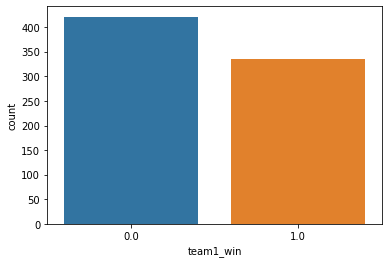

In [62]:
new_df.loc[new_df["winner"]==new_df["team1"],"team1_win"]=1
new_df.loc[new_df["winner"]!=new_df["team1"],"team1_win"]=0

new_df.loc[new_df["toss_winner"]==new_df["team1"],"team1_toss_win"]=1
new_df.loc[new_df["toss_winner"]!=new_df["team1"],"team1_toss_win"]=0

new_df["team1_bat"]=0.0
new_df.loc[(new_df["team1_toss_win"]==1) & (new_df["toss_decision"]==0),"team1_bat"]=1.0

#Checking for the distribution of the dataset
sns.countplot(x="team1_win",data=new_df)
plt.show()




In [63]:
new_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,9,14,470,13,12,12,1,1,0,13,35,0,224,28,6,34,1.0,0.0,0.0
1,2,9,26,471,8,11,11,1,1,0,11,0,7,199,21,1,49,0.0,0.0,0.0
2,3,9,28,472,4,7,7,1,1,0,7,0,10,34,31,38,16,0.0,0.0,0.0
3,4,9,15,473,11,5,5,1,1,0,5,0,6,61,13,3,14,0.0,0.0,0.0
4,5,9,2,473,12,3,12,0,1,0,12,15,0,99,17,61,65,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,11,23,14,7,8,8,1,1,0,8,0,9,64,40,36,39,0.0,0.0,0.0
752,11412,11,7,20,0,8,0,0,1,0,8,0,6,22,18,37,38,0.0,1.0,1.0
753,11413,11,31,24,13,2,2,1,1,0,2,0,2,170,0,61,65,0.0,0.0,0.0
754,11414,11,31,31,2,0,0,1,1,0,0,0,6,55,0,55,13,0.0,0.0,0.0


In [71]:
prediction_df=new_df[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]
#dropping higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.107006,-0.119418,-0.119418,0.108539
team2,-0.107006,1.000000,-0.010893,-0.010893,0.081898
team1_toss_win,-0.119418,-0.010893,1.000000,1.000000,0.049083
team1_bat,-0.119418,-0.010893,1.000000,1.000000,0.049083
venue,0.108539,0.081898,0.049083,0.049083,1.000000


In [72]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

prediction_df.drop(columns=correlated_features)

#feature selection
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0,shuffle=True)

In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
#Scaling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
print("MSE:"+str(mean_squared_error(y_pred, y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(y_pred, y_test))))
print("MSLE:"+str(mean_squared_log_error(y_pred, y_test)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(y_pred, y_test))))
print("MAE:"+str(mean_absolute_error(y_pred, y_test)))

Accuracy of logistic regression classifier on test set: 0.5329
MSE:0.46710526315789475
RMSE:0.6834509954326606
MSLE:0.22442213150126514
RMSLE:0.47373213053503677
MAE:0.46710526315789475


In [75]:
#SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))
print("MSE:"+str(mean_squared_error(y_pred, y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(y_pred, y_test))))
print("MSLE:"+str(mean_squared_log_error(y_pred, y_test)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(y_pred, y_test))))
print("MAE:"+str(mean_absolute_error(y_pred, y_test)))

Accuracy of SVM classifier on test set: 0.5263
MSE:0.47368421052631576
RMSE:0.6882472016116853
MSLE:0.22758300659283223
RMSLE:0.4770566073254119
MAE:0.47368421052631576


In [76]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))
print("MSE:"+str(mean_squared_error(y_pred, y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(y_pred, y_test))))
print("MSLE:"+str(mean_squared_log_error(y_pred, y_test)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(y_pred, y_test))))
print("MAE:"+str(mean_absolute_error(y_pred, y_test)))

Accuracy of decision tree classifier on test set: 0.5395
MSE:0.4605263157894737
RMSE:0.6786208925382962
MSLE:0.22126125640969802
RMSLE:0.4703841583319936
MAE:0.4605263157894737


In [77]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred=randomForest.predict(X_test)
print('Accuracy of decision Random Forest on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))
print("MSE:"+str(mean_squared_error(y_pred, y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(y_pred, y_test))))
print("MSLE:"+str(mean_squared_log_error(y_pred, y_test)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(y_pred, y_test))))
print("MAE:"+str(mean_absolute_error(y_pred, y_test)))

Accuracy of decision Random Forest on test set: 0.5526
MSE:0.4473684210526316
RMSE:0.6688560540599386
MSLE:0.2149395062265638
RMSLE:0.46361568807209685
MAE:0.4473684210526316


<h1> Deep Learning Tasks

In [78]:
# Importing Libraries 
import torch
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [79]:
prediction_df
dataset_size = len(prediction_df)
split = int(np.floor((0.05) * dataset_size))
df_train = prediction_df.iloc[split:,:]
df_test = prediction_df.iloc[:split,:]
indices = list(range(len(prediction_df)))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train1 = sc.fit_transform(df_train.iloc[:,:-1])
df_train1 = pd.DataFrame(df_train1)
df_train1
df_train1['label']  = df_train.iloc[:,-1].values/300
df_train = df_train1.copy()

df_train = pd.DataFrame(df_train)
df_train = df_train.astype(float)
display(df_train.head())

sc = StandardScaler()
df_test1 = sc.fit_transform(df_test.iloc[:,:-1])
df_test1 = pd.DataFrame(df_test1)
df_test1['label']  = df_test.iloc[:,-1].values/300
df_test = df_test1.copy()

df_test = pd.DataFrame(df_test)
df_test = df_test.astype(float)
display(df_test.head())

print('Size of training data :', df_train.shape[0])
print('Size of test data :', df_test.shape[0])



,0,1,2,3,4,label
0,-0.627351,1.050809,-0.812716,-0.812716,-0.893029,0.070000
1,1.541232,-0.928318,-0.812716,-0.812716,-0.893029,0.030000
2,0.095510,1.050809,-0.812716,-0.812716,-0.893029,0.026667
3,-0.627351,-0.928318,-0.812716,-0.812716,-0.893029,0.030000
4,-0.386397,1.298200,-0.812716,-0.812716,1.119785,0.056667


,0,1,2,3,4,label
0,1.156082,1.532541,-0.483046,-0.483046,1.145644,0.093333
1,-0.164135,1.202867,-0.483046,-0.483046,-0.872872,0.070000
2,-1.220308,-0.115832,-0.483046,-0.483046,-0.872872,0.103333
3,0.627995,-0.775181,-0.483046,-0.483046,-0.872872,0.043333
4,0.892038,-1.434530,2.070197,2.070197,1.145644,0.056667


Size of training data : 719
Size of test data : 37
